# Decisiton Tree interpretability notebook

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import plot_tree
from dtreeviz.trees import *
from pycaret import classification

### Exploratory data analysis
Import to specify correctly the data path. Initally we can make an easy exploration.

In [2]:
data_folder_path = os.path.join('/', '')
data_file = 'ds.csv'

In [3]:
df = pd.read_csv(os.path.join(data_folder_path, data_file))
df.describe()
df.gender.value_counts()

1    2700
0    1511
Name: gender, dtype: int64

In [4]:
df.columns

Index(['matchPeriod', 'Passes', 'Successful_passes', 'Unsuccessful_passes',
       'Crosses', 'Successful_crosses', 'Unsuccessful_crosses', 'Long_passes',
       'Long_passes_won', 'Long_passes_lost', 'Aerial', 'Aerial_won',
       'Aerial_lost', 'Ground_duels', 'Ground_duels_won', 'Ground_duels_lost',
       'Free_kicks', 'Fouls_received', 'Fouls_conceded', 'Corners',
       'Corners_successful', 'Corners_unsuccessful', 'Interceptions', 'Saves',
       'Clearances', 'Shots', 'Shots_on_target', 'Shots_off_target', 'Goals',
       'Goals_from_penalty', 'Own_goals', 'PlayerType', 'gender'],
      dtype='object')

In [5]:
playerTypes = pd.get_dummies(df['PlayerType'])
df = pd.concat([df.drop("PlayerType", axis=1), playerTypes], axis=1)
df.head()

,matchPeriod,Passes,Successful_passes,Unsuccessful_passes,Crosses,Successful_crosses,Unsuccessful_crosses,Long_passes,Long_passes_won,Long_passes_lost,...,Own_goals,gender,Defender,DefenderSubstitute,Forward,ForwardSubstitute,Goalkeeper,GoalkeeperSubstitute,Midfielder,MidfielderSubstitute
0,2H,5,4,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1H,23,18,5,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
2,1H,20,15,5,3,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,2H,20,17,3,0,0,0,2,1,1,...,0,1,0,0,0,0,0,0,1,0
4,2H,23,19,4,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


### Classification Set-up
Definition of main model hyperparameters. Numeric features and target with full description available.

In [4]:
classification_setup = classification.setup(
    data=df,
    target='gender',
    numeric_features=[c for c in df.columns if c not in ['gender', 'matchPeriod', 'PlayerType']]
)

Setup Succesfully Completed!


,Description,Value
0,session_id,7940
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(4211, 33)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Initial exploration to understand general performance metrics for different classification algorithms (Focus at Accuracy and AUC)

In [8]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0226
1,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0468
2,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0205
3,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0553
4,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3625
5,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8640
6,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6481
7,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6333
8,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2130
9,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.6452


GaussianNB(priors=None, var_smoothing=1e-09)

Decision tree implementation, prunning of the tree at 40 samples per leaf and looking at the Entropy gain of each split.

Model evaluated with a 10-fold cross validation.

In [6]:
dt_model = classification.create_model('dt', min_samples_leaf=40, criterion='entropy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8712,0.9296,0.8889,0.9081,0.8984,0.7225,0.7228
1,0.8881,0.9430,0.8995,0.9239,0.9115,0.7595,0.7600
2,0.8508,0.9243,0.9153,0.8607,0.8872,0.6678,0.6706
3,0.8610,0.9315,0.8730,0.9066,0.8895,0.7025,0.7034
4,0.8508,0.9222,0.8836,0.8836,0.8836,0.6761,0.6761
5,0.8441,0.9284,0.8783,0.8783,0.8783,0.6613,0.6613
6,0.8712,0.9196,0.8836,0.9126,0.8978,0.7237,0.7244
7,0.8299,0.9102,0.9048,0.8424,0.8724,0.6183,0.6219
8,0.8537,0.9363,0.8995,0.8763,0.8877,0.6781,0.6786
9,0.8299,0.9013,0.8889,0.8528,0.8705,0.6233,0.6244


In [7]:
tuned_dt_model = classification.tune_model(dt_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8881,0.9470,0.8889,0.9333,0.9106,0.7615,0.7631
1,0.8949,0.9458,0.9206,0.9158,0.9182,0.7713,0.7713
2,0.9254,0.9484,0.9630,0.9239,0.9430,0.8353,0.8368
3,0.8847,0.9175,0.9206,0.9016,0.9110,0.7476,0.7479
4,0.9085,0.9434,0.9312,0.9263,0.9288,0.8008,0.8008
5,0.8881,0.9187,0.8995,0.9239,0.9115,0.7595,0.7600
6,0.8983,0.9182,0.9259,0.9162,0.9211,0.7782,0.7783
7,0.8912,0.9104,0.9312,0.9026,0.9167,0.7599,0.7607
8,0.8810,0.9435,0.8783,0.9326,0.9046,0.7466,0.7490
9,0.8946,0.9294,0.9312,0.9072,0.9191,0.7679,0.7685


In [7]:
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7940, splitter='best')

### Decision Tree implementation
- Feature importance as an aggregated from each split.
- Full Tree visualization.

In [11]:
classification_setup[0].columns

Index(['Passes', 'Successful_passes', 'Unsuccessful_passes', 'Crosses',
       'Successful_crosses', 'Unsuccessful_crosses', 'Long_passes',
       'Long_passes_won', 'Long_passes_lost', 'Aerial', 'Aerial_won',
       'Aerial_lost', 'Ground_duels', 'Ground_duels_won', 'Ground_duels_lost',
       'Free_kicks', 'Fouls_won', 'Fouls_conceded', 'Corners',
       'Corners_successful', 'Corners_unsuccessful', 'Interceptions', 'Saves',
       'Clearance_won', 'Shots', 'Shots_on_target', 'Shots_off_target',
       'Goals', 'Goals_from_penalty', 'Own_goals', 'matchPeriod_1H',
       'matchPeriod_2H', 'matchPeriod_E1', 'matchPeriod_E2', 'matchPeriod_P',
       'PlayerType_Defender', 'PlayerType_DefenderSubstitute',
       'PlayerType_Forward', 'PlayerType_ForwardSubstitute',
       'PlayerType_Goalkeeper', 'PlayerType_GoalkeeperSubstitute',
       'PlayerType_Midfielder', 'PlayerType_MidfielderSubstitute'],
      dtype='object')

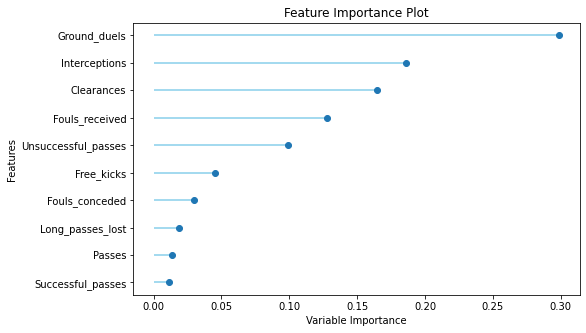

In [9]:
plot_options = ["auc","threshold","pr","confusion_matrix","error","class_report","boundary","rfe","learning","manifold","calibration","vc","dimension","feature","parameter"]
classification.plot_model(dt_model, plot='feature', save=True)
#Importance of the features measured by how much the nod purity is imporved on average.

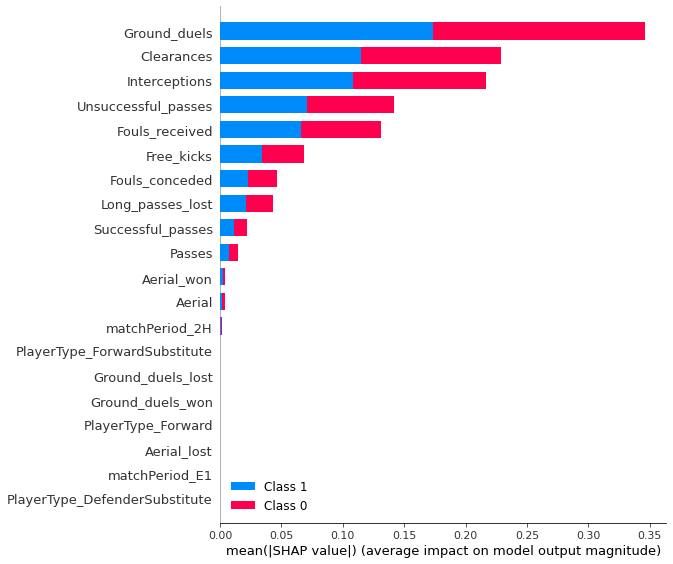

In [14]:
interpretation_options = ['summary', 'correlation', 'reason']
classification.interpret_model(dt_model, interpretation_options[0])

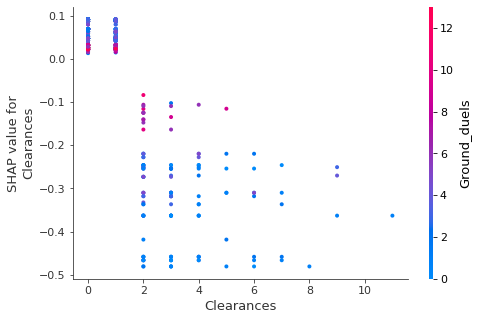

In [23]:
classification.interpret_model(dt_model, interpretation_options[1], feature='Clearances')

In [15]:
viz = dtreeviz(dt_model, classification_setup[0], df.gender, target_name='gender', feature_names=classification_setup[0].columns, class_names=['Female', 'Male'], orientation='TD', fontname='serif')
viz.view()

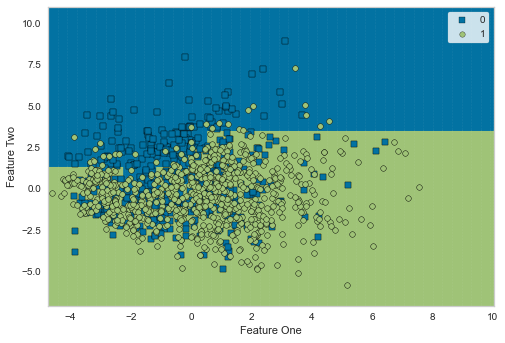

In [19]:
classification.plot_model(dt_model, plot='boundary')

[Text(240.8752840909091, 207.55636363636364, 'X[12] <= 5.5\nentropy = 0.942\nsamples = 2947\nvalue = [1057, 1890]'),
 Text(180.4305681818182, 187.7890909090909, 'X[23] <= 0.5\nentropy = 1.0\nsamples = 1885\nvalue = [962, 923]'),
 Text(128.02295454545455, 168.0218181818182, 'X[21] <= 0.5\nentropy = 0.958\nsamples = 1302\nvalue = [495, 807]'),
 Text(97.77681818181819, 148.25454545454545, 'X[2] <= 3.5\nentropy = 0.996\nsamples = 736\nvalue = [394, 342]'),
 Text(73.80818181818182, 128.48727272727274, 'X[16] <= 0.5\nentropy = 0.99\nsamples = 580\nvalue = [256, 324]'),
 Text(56.30727272727273, 108.72, 'X[8] <= 0.5\nentropy = 0.949\nsamples = 490\nvalue = [180, 310]'),
 Text(39.56727272727273, 88.95272727272729, 'X[15] <= 0.5\nentropy = 0.879\nsamples = 392\nvalue = [117, 275]'),
 Text(24.34909090909091, 69.18545454545455, 'X[12] <= 1.5\nentropy = 0.956\nsamples = 292\nvalue = [110, 182]'),
 Text(12.174545454545456, 49.418181818181836, 'X[1] <= 2.5\nentropy = 1.0\nsamples = 166\nvalue = [83, 83]'),
 Text(6.087272727272728, 29.650909090909096, 'entropy = 0.899\nsamples = 73\nvalue = [50, 23]'),
 Text(18.261818181818185, 29.650909090909096, 'X[2] <= 0.5\nentropy = 0.938\nsamples = 93\nvalue = [33, 60]'),
 Text(12.174545454545456, 9.883636363636384, 'entropy = 0.759\nsamples = 41\nvalue = [9, 32]'),
 Text(24.34909090909091, 9.883636363636384, 'entropy = 0.996\nsamples = 52\nvalue = [24, 28]'),
 Text(36.52363636363637, 49.418181818181836, 'X[0] <= 5.5\nentropy = 0.75\nsamples = 126\nvalue = [27, 99]'),
 Text(30.436363636363637, 29.650909090909096, 'entropy = 0.29\nsamples = 59\nvalue = [3, 56]'),
 Text(42.6109090909091, 29.650909090909096, 'entropy = 0.941\nsamples = 67\nvalue = [24, 43]'),
 Text(54.78545454545455, 69.18545454545455, 'X[31] <= 0.5\nentropy = 0.366\nsamples = 100\nvalue = [7, 93]'),
 Text(48.69818181818182, 49.418181818181836, 'entropy = 0.463\nsamples = 51\nvalue = [5, 46]'),
 Text(60.872727272727275, 49.418181818181836, 'entropy = 0.246\nsamples = 49\nvalue = [2, 47]'),
 Text(73.04727272727274, 88.95272727272729, 'X[1] <= 4.5\nentropy = 0.94\nsamples = 98\nvalue = [63, 35]'),
 Text(66.96000000000001, 69.18545454545455, 'entropy = 0.712\nsamples = 41\nvalue = [33, 8]'),
 Text(79.13454545454546, 69.18545454545455, 'entropy = 0.998\nsamples = 57\nvalue = [30, 27]'),
 Text(91.30909090909091, 108.72, 'X[9] <= 0.5\nentropy = 0.624\nsamples = 90\nvalue = [76, 14]'),
 Text(85.2218181818182, 88.95272727272729, 'entropy = 0.378\nsamples = 41\nvalue = [38, 3]'),
 Text(97.39636363636365, 88.95272727272729, 'entropy = 0.768\nsamples = 49\nvalue = [38, 11]'),
 Text(121.74545454545455, 128.48727272727274, 'X[16] <= 0.5\nentropy = 0.516\nsamples = 156\nvalue = [138, 18]'),
 Text(115.65818181818183, 108.72, 'X[12] <= 2.5\nentropy = 0.626\nsamples = 115\nvalue = [97, 18]'),
 Text(109.5709090909091, 88.95272727272729, 'entropy = 0.375\nsamples = 69\nvalue = [64, 5]'),
 Text(121.74545454545455, 88.95272727272729, 'entropy = 0.859\nsamples = 46\nvalue = [33, 13]'),
 Text(127.83272727272728, 108.72, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(158.26909090909092, 148.25454545454545, 'X[17] <= 0.5\nentropy = 0.677\nsamples = 566\nvalue = [101, 465]'),
 Text(152.1818181818182, 128.48727272727274, 'X[15] <= 0.5\nentropy = 0.548\nsamples = 506\nvalue = [64, 442]'),
 Text(140.00727272727275, 108.72, 'X[21] <= 2.5\nentropy = 0.74\nsamples = 277\nvalue = [58, 219]'),
 Text(133.92000000000002, 88.95272727272729, 'X[12] <= 3.5\nentropy = 0.835\nsamples = 211\nvalue = [56, 155]'),
 Text(127.83272727272728, 69.18545454545455, 'X[2] <= 1.5\nentropy = 0.928\nsamples = 140\nvalue = [48, 92]'),
 Text(121.74545454545455, 49.418181818181836, 'entropy = 0.692\nsamples = 70\nvalue = [13, 57]'),
 Text(133.92000000000002, 49.418181818181836, 'entropy = 1.0\nsamples = 70\nvalue = [35, 35]'),
 Text(140.00727272727275, 69.18545454545455, 'entropy = 0.508\nsamples = 71\nvalue = [8, 63]'),
 Text(146.09454545454548, 88.95272727272729, 'entropy = 0.196\nsampl

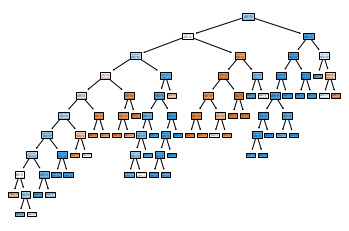

In [18]:

plot_tree(dt_model, filled=True)

### Scientific Reporting

In [19]:
coef_df = pd.DataFrame({'Feature': classification_setup[0].columns, 'Coefficients': dt_model.feature_importances_})

In [23]:
coef_df.sort_values(by=['Coefficients'], ascending=False).head(10).to_latex(index=False)

'\\begin{tabular}{lr}\n\\toprule\n               Feature &  Coefficients \\\\\n\\midrule\n          Ground\\_duels &      0.308840 \\\\\n        Fouls\\_received &      0.167490 \\\\\n            Clearances &      0.135580 \\\\\n         Interceptions &      0.118301 \\\\\n   Unsuccessful\\_passes &      0.084388 \\\\\n        Fouls\\_conceded &      0.078676 \\\\\n PlayerType\\_Goalkeeper &      0.023302 \\\\\n      Long\\_passes\\_lost &      0.018937 \\\\\n            Free\\_kicks &      0.015709 \\\\\n     Successful\\_passes &      0.014780 \\\\\n\\bottomrule\n\\end{tabular}\n'